In [1]:
import torch
from jackpot import Jackpot

In [2]:
params = {  
    "experiment_name": "minimal_tuto",  
    "save_plot": True,            # Save figures under saves/<experiment_name>/  
    "n_singular_pairs": 10,       # Number of leading singular directions to compute  
    "max_compute_time": 3600,     # Maximum computing time in seconds  
    "load_sing_pairs": True,      # Reuse previous spectrum if available  
    "save_sing_pairs": True,      # Save computed spectrum
    "D": 1,                       # Manifold dimension  
    "epsilon": 1e-1,              # Radius in measurement space ||Φ(x)-Φ(x*)|| ≤ ε  
    "n_points_per_axis": 101,     # Grid resolution per manifold axis  
    "grid_length": 1.0,           # Length in parameter coords (per axis)  
    "load_manifold": True,        # Load precomputed manifold if available  
    "save_manifold": True,        # Save computed manifold
}  

In [3]:
# ------------------------------------
#  DIRECT MODEL (TO BE COMPLETED BY THE USER)
# ------------------------------------

# Device & dtype setup
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float64
factory_kwargs = {"device": device, "dtype": dtype}
torch.manual_seed(0)

# Example: diagonal linear operator with shift
N = 2000
x_center = torch.randn((N,), **factory_kwargs)

A_diag = torch.ones(N, **factory_kwargs)
A_diag[0] = 1e-4
A_diag[1] = 1e-2

def Phi(x): 
    """Forward operator (replace with your own model)."""
    return A_diag * (x - x_center)

# Initial guess
x_est = x_center.clone()
# ------------------------------------

In [4]:
# ------------------------------------
# JACKPOT INITIALIZATION
# ------------------------------------
jack = Jackpot(Phi, x_est)

jack.set_params(**params)
# ------------------------------------

saves/minimal_tuto/minimal_tuto_n_10.singpairs loaded.



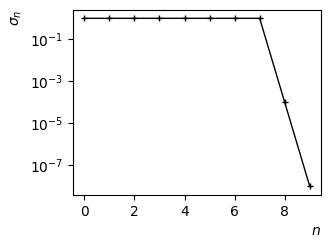

In [5]:
# ------------------------------------
# JACOBIAN SINGULAR SPECTRUM
# ------------------------------------
jack.jacobian_spectrum()

# Plot spectrum
jack.jacobian_spectrum_plot()
# ------------------------------------

saves/minimal_tuto/minimal_tuto_d_1_eps_0.1_n_101_l_1.manifold loaded.


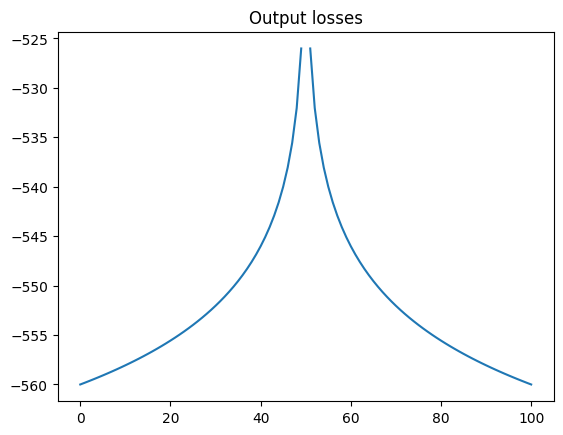

In [6]:
# ------------------------------------
# JACKPOT MANIFOLD
# ------------------------------------
jack.manifold()

# Plot discrepancy
jack.plot_discrepancy(
    in_SNR=True,
    levels=[20, 30, 40],
    color_levels=["g", "b", "r"]
)
# ------------------------------------